# Brownian Motion

Brownian motion is the stochastic motion of particles induced by random collisions with molecules and becomes relevant only for certain conditions. That is the random motion of particles suspended in a medium 2-dimensional random walk.

### Brownian Simulation:

In [66]:
import investpy
df_adidas = investpy.get_stock_historical_data(stock='ADSGn', #Adidas Stock Price
                                               country='Germany',
                                               from_date='01/01/2022', #First Quarter of 2022
                                               to_date='31/03/2022')
df_adidas.tail(5)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-03-25,213.30,216.75,211.65,212.45,705915,EUR
2022-03-28,213.10,216.55,212.20,212.80,509566,EUR
2022-03-29,216.95,218.05,213.40,217.80,695529,EUR
2022-03-30,218.20,218.40,213.60,216.40,694586,EUR
2022-03-31,217.95,219.15,211.15,211.90,750979,EUR


In [103]:
df_adidas.describe()

,Open,High,Low,Close,Volume
count,64.000000,64.000000,64.000000,64.000000,6.400000e+01
mean,229.196250,232.854687,225.509062,228.697187,8.948522e+05
std,21.191948,20.193764,21.717597,20.805870,4.206270e+05
min,172.180000,183.400000,170.080000,176.900000,4.044180e+05
25%,213.137500,216.587500,209.950000,212.350000,6.383125e+05
50%,232.525000,236.050000,229.375000,232.700000,7.486150e+05
75%,246.300000,248.300000,242.475000,244.425000,1.059112e+06
max,260.000000,263.750000,259.450000,260.850000,2.380612e+06


Suppose price values of Adidas follows a Geometric Brownian motion. Then, what is the distribution of log returns?

## Calculate the log returns

Using the log returns, estimate drift parameter µGB and scale parameter σ corresponding the Geometric Brownian.

In [115]:
import math
import statistics as st
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,7)

In [100]:
log_return = []
for i in range(len(df_adidas)-1):
    log_return = log_return + [math.log(df_adidas.Close[i+1] / df_adidas.Close[i])]
    
mu = st.mean(log_return)
sd = st.stdev(log_return)
mu, sd

(-0.0031920574967271497, 0.028703030234864688)

In [101]:
mu_GB = mu + ((sd**2)/2) # Drift parameter
sigma = sd # Scale parameter
mu_GB, sd

(-0.0027801255243953714, 0.028703030234864688)

Simulate 1000 possible sample paths for closing price of Adidas relevant to the next 20 days.

In [102]:
def BrownianG(m, T, N, sigma, mu_GB, w_0, GB=True):
    # time step
    dt = T/N
    # creating an array to store simulated values
    x = np.zeros((m, N+1))
    # inital values of x
    x[:, 0] = w_0
    x_0 = x[:, 0]
    # generate random numbers from normal distribution
    r = norm.rvs(size = x_0.shape + (N, ), loc = (mu_GB-((sigma**2)/2))*dt, scale = sigma*math.sqrt(dt))
    # compute Brownian Motion by taking cumulative sum of random samples
    np.cumsum(r, axis = -1, out = x[:, 1:])
    x[:, 1:] = w_0*np.exp(x[:, 1:])
    return x

In [105]:
y = BrownianG(1000, 20, 150, sigma, mu_GB, df_adidas.Close[63], GB=True)
y

### Plot the sample paths for next 20 days

In [116]:
def BrownianPlot(y,T):
    # number of steps
    N = y.shape[1]
    # length of time step
    dt = T/(N-1)
    # creating time axis
    t = np.linspace(0.0, N*dt, N)
    
    for k in range(y.shape[0]):
        plt.plot(t, y[k])
    
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.show()

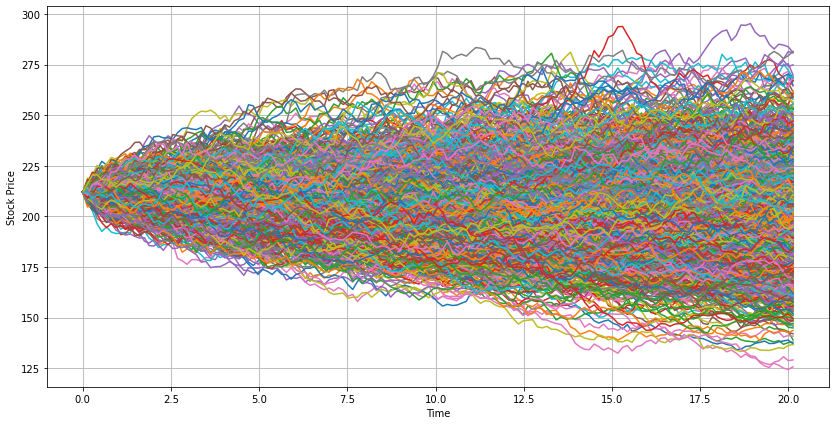

In [117]:
BrownianPlot(y,20)

### Boxplot for the possible closing price values

In [120]:
def BrownianEnd(y,T,loc):
    # number of steps
    N = y.shape[1]
    # length of a step
    dt = T/(N-1)
    # the position of the array corresponding to the given location
    pos = int(loc/dt)
    # boxplot
    plt.boxplot(y[:, pos])
    plt.xlabel('ADSGn')
    plt.ylabel('Stock Price')
    plt.show

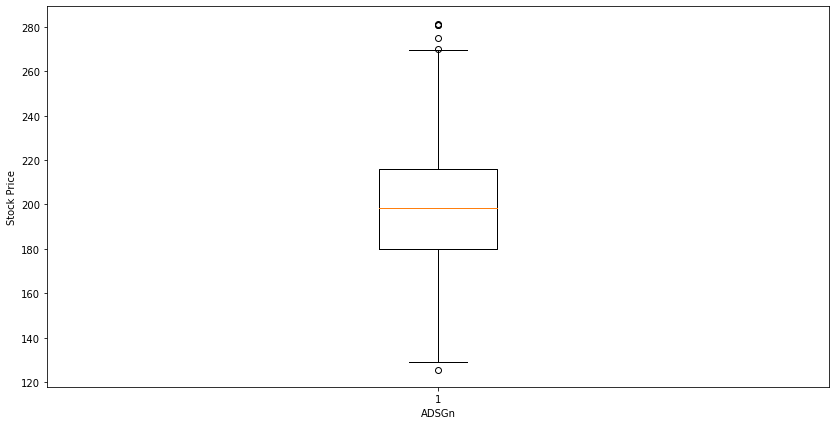

In [121]:
BrownianEnd(y,20,20)

### Probability of the closing prices

In [124]:
df_GBM = pd.DataFrame(y.T)
ending_values_GBM = df_GBM.loc[150]

In [125]:
# probability of Price
len(ending_values_GBM[(ending_values_GBM > 240) & (ending_values_GBM < 300)]) / len(ending_values_GBM)

0.077

In [126]:
# probability of Price
len(ending_values_GBM[(ending_values_GBM > 180) & (ending_values_GBM < 220)]) / len(ending_values_GBM)

0.529

In [127]:
# 95% prediction interval
np.percentile(ending_values_GBM, [2.5, 97.5])

array([151.96299998, 255.55694029])